In [1]:
import math
import random
import numpy as np
import pandas as pd
from scipy.special import gamma
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import itertools
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Addition Transformation
## Linear Regression

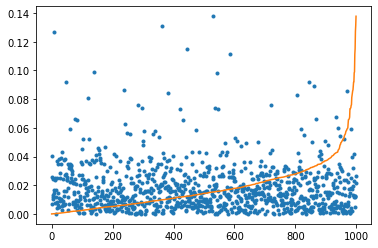

In [5]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
x = torch.sum(x, axis = 1)
train_size = 4000
x = np.array(x[:train_size])
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
X_test = torch.sum(X_test, axis = 1)
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

clf = LinearRegression()
clf.fit(x, y)
y_pred= clf.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
plt.plot(range(test_size),np.abs(y_pred-Y_test),'.',range(test_size),np.sort(np.abs(y_pred-Y_test)))
plt.show()

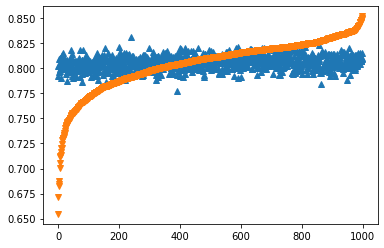

In [6]:
sort = np.argsort(Y_test)
plt.plot(range(test_size),y_pred[sort],'^', range(test_size), Y_test[sort],'v')
plt.show()
np.mean(np.abs(Y_test-np.mean(y)))

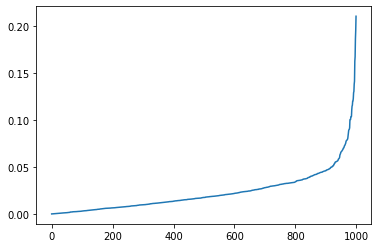

In [13]:
plt.plot(np.sort(np.abs((y_pred-Y_test)/Y_test)))
plt.show()

## Neural network

In [13]:
model = Sequential()
model.add(Dense(1000, input_shape=(x.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(x, y,
                    validation_data = (X_test, Y_test),
                    callbacks=[es],
                    epochs=200,
                    batch_size=50,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              6000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 632,001
Trainable params: 632,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 11s 8ms/step - loss: 5078.2559 - mae: 21.8157 - val_loss: 8.6868 - val_mae: 2.9387
Epoch 2/200
80/80 [==============================] - 0s 5ms/step - loss: 26.0730 - mae: 3.2756 - val_loss: 0.129

Epoch 54/200
80/80 [==============================] - 0s 5ms/step - loss: 7.4291e-04 - mae: 0.0200 - val_loss: 6.8947e-04 - val_mae: 0.0187
Epoch 55/200
80/80 [==============================] - 0s 5ms/step - loss: 7.5712e-04 - mae: 0.0200 - val_loss: 8.1714e-04 - val_mae: 0.0195
Epoch 56/200
80/80 [==============================] - 0s 5ms/step - loss: 7.3751e-04 - mae: 0.0201 - val_loss: 6.9028e-04 - val_mae: 0.0207
Epoch 57/200
80/80 [==============================] - 0s 5ms/step - loss: 7.1852e-04 - mae: 0.0200 - val_loss: 7.1635e-04 - val_mae: 0.0187
Epoch 58/200
80/80 [==============================] - 0s 5ms/step - loss: 7.6466e-04 - mae: 0.0202 - val_loss: 7.4913e-04 - val_mae: 0.0189
Epoch 59/200
80/80 [==============================] - 0s 5ms/step - loss: 7.9631e-04 - mae: 0.0206 - val_loss: 6.7617e-04 - val_mae: 0.0188
Epoch 60/200
80/80 [==============================] - 0s 5ms/step - loss: 7.5677e-04 - mae: 0.0201 - val_loss: 6.9116e-04 - val_mae: 0.0187
Epoch 61/200
80/80 [

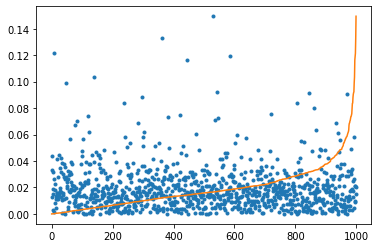

In [14]:
y_pred = model.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
plt.plot(range(test_size),np.abs(y_pred-Y_test),'.',range(test_size),np.sort(np.abs(y_pred-Y_test)))
plt.show()

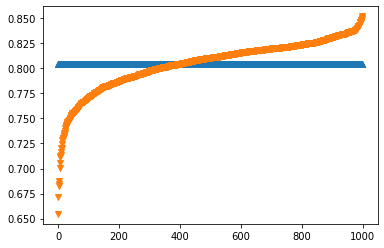

In [15]:
sort = np.argsort(Y_test)
plt.plot(range(test_size),y_pred[sort],'^', range(test_size), Y_test[sort],'v')
plt.show()
np.mean(np.abs(y_pred - Y_test))

# Space-filling Z-curve
## Linear Regression

In [44]:
import zCurve as z 

def order(x, precision=10):
    m,n,_ = x.shape
    b = (np.copy(x)*precision).astype(int)
    c = np.zeros((m,n)).astype(int)
    for i in range(m):
        for j in range(n):
            c[i][j] += z.interlace(int(b[i][j][0]),int(b[i][j][1]))
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 4000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

clf = LinearRegression()
clf.fit(x, y)
y_pred= clf.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
plt.plot(range(test_size),np.abs(y_pred-Y_test),'.',range(test_size),np.sort(np.abs(y_pred-Y_test)))
plt.show()

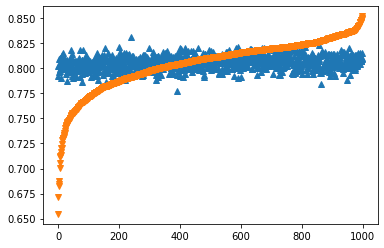

0.018368576926721156

In [46]:
sort = np.argsort(Y_test)
plt.plot(range(test_size),y_pred[sort],'^', range(test_size), Y_test[sort],'v')
plt.show()

np.mean(np.abs(y_pred-Y_test))

## Neural network

In [24]:
model = Sequential()
model.add(Dense(1000, input_shape=(x.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(x, y,
                    validation_data = (X_test, Y_test),
                    callbacks=[es],
                    epochs=200,
                    batch_size=50,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              2501000   
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_6 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 3,127,001
Trainable params: 3,127,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 2s 21ms/step - loss: 509.6121 - mae: 5.4219 - val_loss: 0.0090 - val_mae: 0.0764
Epoch 2/200
80/80 [==============================] - 2s 19ms/step - loss: 0.1469 - mae: 0.2837 - val_loss: 0

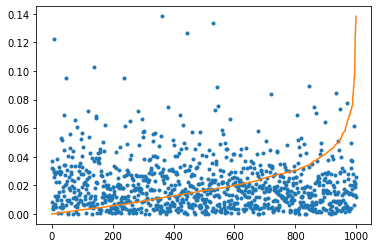

In [25]:
y_pred = model.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
plt.plot(range(test_size),np.abs(y_pred-Y_test),'.',range(test_size),np.sort(np.abs(y_pred-Y_test)))
plt.show()

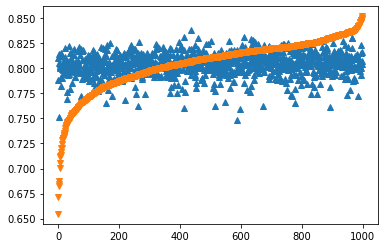

In [28]:
sort = np.argsort(Y_test)
plt.plot(range(test_size),y_pred[sort],'^', range(test_size), Y_test[sort],'v')
plt.show()

np.mean(np.abs(y_pred-Y_test))

# Pyramid ordering (max)
## Linear Regression

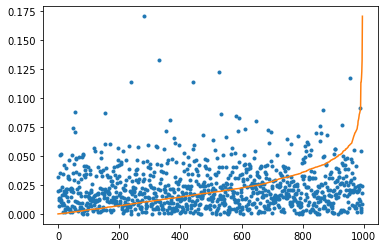

In [13]:
def order(x):
    m,n,_ = x.shape
    c = np.max(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 4000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

clf = LinearRegression()
clf.fit(x, y)
y_pred= clf.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
k = np.abs(y_pred-Y_test)
K = k[k<1]
plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
plt.show()

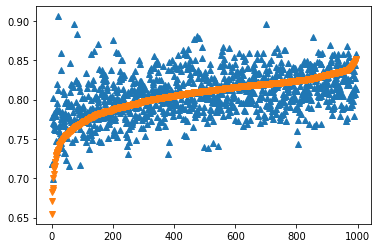

0.022632706102477498 4


In [17]:
sort = np.argsort(Y_test[k<1])
plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
plt.show()

print(np.mean(K),test_size-len(K))

## Neural network

In [18]:
model = Sequential()
model.add(Dense(1000, input_shape=(x.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(x, y,
                    validation_data = (X_test, Y_test),
                    callbacks=[es],
                    epochs=200,
                    batch_size=50,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              2501000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 3,127,001
Trainable params: 3,127,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 13s 23ms/step - loss: 410.2636 - mae: 4.9062 - val_loss: 0.0200 - val_mae: 0.1281
Epoch 2/200
80/80 [==============================] - 2s 21ms/step - loss: 0.1398 - mae: 0.2027 - val_loss: 0.

80/80 [==============================] - 1s 18ms/step - loss: 7.2410e-04 - mae: 0.0215 - val_loss: 0.0012 - val_mae: 0.0282
Epoch 56/200
80/80 [==============================] - 1s 18ms/step - loss: 6.8412e-04 - mae: 0.0212 - val_loss: 8.1205e-04 - val_mae: 0.0214
Epoch 57/200
80/80 [==============================] - 1s 18ms/step - loss: 5.5833e-04 - mae: 0.0182 - val_loss: 6.7347e-04 - val_mae: 0.0192
Epoch 58/200
80/80 [==============================] - 1s 18ms/step - loss: 6.8648e-04 - mae: 0.0212 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 59/200
80/80 [==============================] - 1s 18ms/step - loss: 6.3059e-04 - mae: 0.0202 - val_loss: 5.8598e-04 - val_mae: 0.0176
Epoch 60/200
80/80 [==============================] - 1s 18ms/step - loss: 4.6254e-04 - mae: 0.0172 - val_loss: 8.7755e-04 - val_mae: 0.0244
Epoch 61/200
80/80 [==============================] - 1s 18ms/step - loss: 5.2675e-04 - mae: 0.0181 - val_loss: 5.5066e-04 - val_mae: 0.0170
Epoch 62/200
80/80 [==============

80/80 [==============================] - 2s 19ms/step - loss: 2.0301e-04 - mae: 0.0109 - val_loss: 7.1626e-04 - val_mae: 0.0207
Epoch 114/200
80/80 [==============================] - 2s 19ms/step - loss: 1.8884e-04 - mae: 0.0108 - val_loss: 7.8060e-04 - val_mae: 0.0220
Epoch 115/200
80/80 [==============================] - 1s 19ms/step - loss: 2.0985e-04 - mae: 0.0113 - val_loss: 5.8781e-04 - val_mae: 0.0182
Epoch 116/200
80/80 [==============================] - 1s 18ms/step - loss: 2.0979e-04 - mae: 0.0103 - val_loss: 6.6104e-04 - val_mae: 0.0196
Epoch 117/200
80/80 [==============================] - 2s 19ms/step - loss: 1.8820e-04 - mae: 0.0108 - val_loss: 7.5268e-04 - val_mae: 0.0222
Epoch 118/200
80/80 [==============================] - 1s 18ms/step - loss: 1.6247e-04 - mae: 0.0098 - val_loss: 6.1567e-04 - val_mae: 0.0186
Epoch 119/200
80/80 [==============================] - 1s 18ms/step - loss: 1.6373e-04 - mae: 0.0100 - val_loss: 6.1606e-04 - val_mae: 0.0186
Epoch 120/200
80/80 

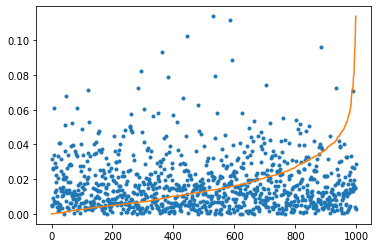

In [20]:
y_pred = model.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
k = np.abs(y_pred-Y_test)
K = k[k<1]
plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
plt.show()

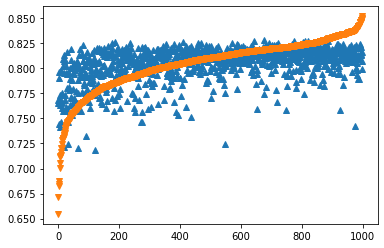

0.0170774 0


In [21]:
sort = np.argsort(Y_test[k<1])
plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
plt.show()

print(np.mean(K),test_size-len(K))

# Pyramic Ordering (min)
## Linear regression

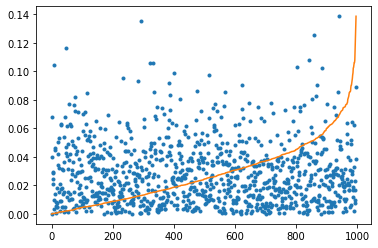

In [23]:
def order(x):
    m,n,_ = x.shape
    c = np.min(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 4000
x = order(np.array(x[:train_size]))
y = np.array(y[:train_size])

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

clf = LinearRegression()
clf.fit(x, y)
y_pred= clf.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
k = np.abs(y_pred-Y_test)
K = k[k<1]
plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
plt.show()

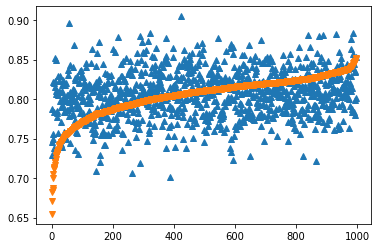

0.028523751068948982 2


In [24]:
sort = np.argsort(Y_test[k<1])
plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
plt.show()

print(np.mean(K),test_size-len(K))

## Neural network

In [25]:
model = Sequential()
model.add(Dense(1000, input_shape=(x.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(x, y,
                    validation_data = (X_test, Y_test),
                    callbacks=[es],
                    epochs=200,
                    batch_size=50,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              2501000   
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_6 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 3,127,001
Trainable params: 3,127,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 2s 24ms/step - loss: 424.5709 - mae: 4.8826 - val_loss: 0.0461 - val_mae: 0.1986
Epoch 2/200
80/80 [==============================] - 2s 22ms/step - loss: 0.1143 - mae: 0.2685 - val_loss: 0

Epoch 56/200
80/80 [==============================] - 2s 20ms/step - loss: 9.0490e-04 - mae: 0.0244 - val_loss: 8.3885e-04 - val_mae: 0.0216
Epoch 57/200
80/80 [==============================] - 2s 21ms/step - loss: 7.2331e-04 - mae: 0.0211 - val_loss: 0.0012 - val_mae: 0.0258
Epoch 58/200
80/80 [==============================] - 2s 20ms/step - loss: 8.2300e-04 - mae: 0.0233 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 59/200
80/80 [==============================] - 2s 19ms/step - loss: 9.5809e-04 - mae: 0.0258 - val_loss: 0.0016 - val_mae: 0.0349
Epoch 60/200
80/80 [==============================] - 2s 22ms/step - loss: 8.7444e-04 - mae: 0.0239 - val_loss: 7.7799e-04 - val_mae: 0.0210
Epoch 61/200
80/80 [==============================] - 2s 22ms/step - loss: 6.6315e-04 - mae: 0.0202 - val_loss: 0.0014 - val_mae: 0.0293
Epoch 62/200
80/80 [==============================] - 2s 21ms/step - loss: 8.4939e-04 - mae: 0.0224 - val_loss: 0.0014 - val_mae: 0.0322
Epoch 63/200
80/80 [=============

80/80 [==============================] - 1s 18ms/step - loss: 2.2667e-04 - mae: 0.0115 - val_loss: 7.3456e-04 - val_mae: 0.0198
Epoch 115/200
80/80 [==============================] - 1s 18ms/step - loss: 2.3814e-04 - mae: 0.0118 - val_loss: 7.5141e-04 - val_mae: 0.0208
Epoch 116/200
80/80 [==============================] - 1s 19ms/step - loss: 2.3689e-04 - mae: 0.0118 - val_loss: 9.2679e-04 - val_mae: 0.0222
Epoch 117/200
80/80 [==============================] - 1s 19ms/step - loss: 2.2980e-04 - mae: 0.0118 - val_loss: 6.7028e-04 - val_mae: 0.0187
Epoch 118/200
80/80 [==============================] - 1s 19ms/step - loss: 1.8405e-04 - mae: 0.0107 - val_loss: 9.9979e-04 - val_mae: 0.0250
Epoch 119/200
80/80 [==============================] - 1s 19ms/step - loss: 2.2954e-04 - mae: 0.0116 - val_loss: 6.9008e-04 - val_mae: 0.0194
Epoch 120/200
80/80 [==============================] - 1s 18ms/step - loss: 2.0110e-04 - mae: 0.0110 - val_loss: 7.1743e-04 - val_mae: 0.0199
Epoch 121/200
80/80 

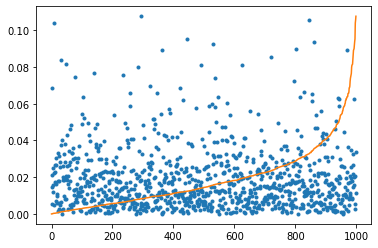

In [26]:
y_pred = model.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
k = np.abs(y_pred-Y_test)
K = k[k<1]
plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
plt.show()

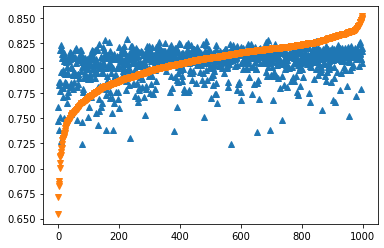

0.019030584 0


In [27]:
sort = np.argsort(Y_test[k<1])
plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
plt.show()

print(np.mean(K),test_size-len(K))

In [28]:
np.mean(np.abs(Y_test-np.mean(y)))

0.019125488

In [62]:
def transform(x):
    a = np.min(x)
    b = np.max(x)
    t = len(x)
    k = np.argsort(x)
    return k*(b-a)/(t-1) + a

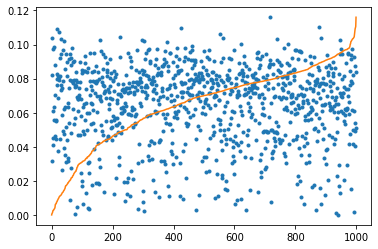

In [68]:
x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
x = torch.sum(x, axis = 1)
train_size = 4000
x = np.array(x[:train_size])
y = transform(np.array(y[:train_size]))

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
X_test = torch.sum(X_test, axis = 1)
test_size = 1000
X_test = np.array(X_test[train_size:train_size+test_size])
Y_test = np.array(Y_test[train_size:train_size+test_size])

y.shape = (y.shape[0],1)
Y_test.shape = (Y_test.shape[0],1)

clf = LinearRegression()
clf.fit(x, y)
y_pred= clf.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
plt.plot(range(test_size),np.abs(y_pred-Y_test),'.',range(test_size),np.sort(np.abs(y_pred-Y_test)))
plt.show()

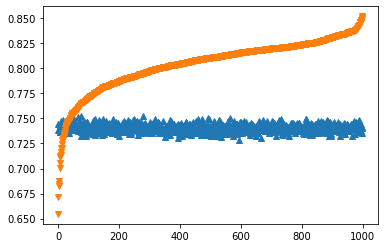

0.06491297169608529

In [69]:
sort = np.argsort(Y_test)
plt.plot(range(test_size),y_pred[sort],'^', range(test_size), Y_test[sort],'v')
plt.show()
np.mean(np.abs(Y_test-y_pred))

In [70]:
model = Sequential()
model.add(Dense(1000, input_shape=(x.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(x, y,
                    validation_data = (X_test, Y_test),
                    callbacks=[es],
                    epochs=200,
                    batch_size=50,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              6000      
_________________________________________________________________
dense_13 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_14 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 251       
Total params: 632,001
Trainable params: 632,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 1s 7ms/step - loss: 6449.0768 - mae: 26.2006 - val_loss: 54.8289 - val_mae: 7.3943
Epoch 2/200
80/80 [==============================] - 0s 6ms/step - loss: 19.3450 - mae: 3.1745 - val_loss: 5.8

80/80 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0591 - val_loss: 0.0025 - val_mae: 0.0454
Epoch 57/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0049 - mae: 0.0605 - val_loss: 0.0036 - val_mae: 0.0557
Epoch 58/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0598 - val_loss: 0.0052 - val_mae: 0.0687
Epoch 59/200
80/80 [==============================] - 0s 6ms/step - loss: 0.0047 - mae: 0.0590 - val_loss: 0.0053 - val_mae: 0.0691
Epoch 60/200
80/80 [==============================] - 0s 6ms/step - loss: 0.0048 - mae: 0.0596 - val_loss: 0.0042 - val_mae: 0.0608
Epoch 61/200
80/80 [==============================] - 0s 6ms/step - loss: 0.0046 - mae: 0.0580 - val_loss: 0.0043 - val_mae: 0.0615
Epoch 62/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0593 - val_loss: 0.0054 - val_mae: 0.0700
Epoch 63/200
80/80 [==============================] - 0s 6ms/step - loss: 0.0048 - mae: 0

80/80 [==============================] - 0s 5ms/step - loss: 0.0049 - mae: 0.0607 - val_loss: 0.0045 - val_mae: 0.0633
Epoch 119/200
80/80 [==============================] - 0s 6ms/step - loss: 0.0047 - mae: 0.0595 - val_loss: 0.0035 - val_mae: 0.0551
Epoch 120/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0595 - val_loss: 0.0034 - val_mae: 0.0546
Epoch 121/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0599 - val_loss: 0.0047 - val_mae: 0.0651
Epoch 122/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0598 - val_loss: 0.0045 - val_mae: 0.0636
Epoch 123/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0590 - val_loss: 0.0059 - val_mae: 0.0733
Epoch 124/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0597 - val_loss: 0.0053 - val_mae: 0.0691
Epoch 125/200
80/80 [==============================] - 0s 5ms/step - loss: 0.0047 -

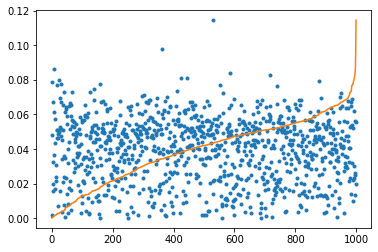

In [71]:
y_pred = model.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
k = np.abs(y_pred-Y_test)
K = k[k<1]
plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
plt.show()

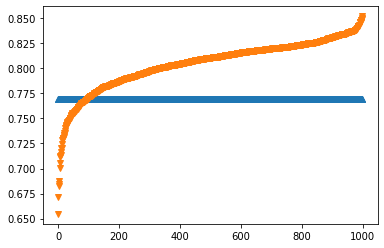

0.039505623 0


In [72]:
sort = np.argsort(Y_test[k<1])
plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
plt.show()

print(np.mean(K),test_size-len(K))

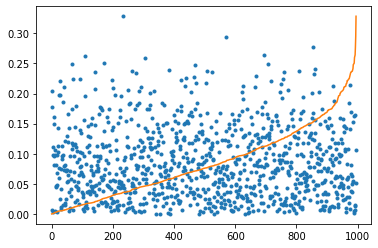

In [73]:
def order(x):
    m,n,_ = x.shape
    c = np.max(np.copy(x), axis = 2)
    sort = np.argsort(c)
    d = np.zeros(x.shape)
    for i in range(m):
        for j in range(n):
            d[i][j] += x[i][sort[i][j]]
    return d

def transform(x, y=None):
    if y is None:
        y=x
    a = np.min(y)
    b = np.max(y)
    t = len(x)
    k = np.argsort(x)
    return k*(b-a)/(t-1) + a

x = torch.load('new_xtrain.pt')
y = torch.load('new_ytrain.pt')
train_size = 4000
x = order(np.array(x[:train_size]))
y = transform(np.array(y[:train_size]))

X_test = torch.load('new_xtrain.pt')
Y_test = torch.load('new_ytrain.pt')
test_size = 1000
X_test = order(np.array(X_test[train_size:train_size+test_size]))
Y_test = np.array(Y_test[train_size:train_size+test_size])

x.shape = (train_size, x.shape[1]*x.shape[2])
X_test.shape = (test_size, X_test.shape[1]*X_test.shape[2])

clf = LinearRegression()
clf.fit(x, y)
y_pred= clf.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
k = np.abs(y_pred-Y_test)
K = k[k<1]
plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
plt.show()

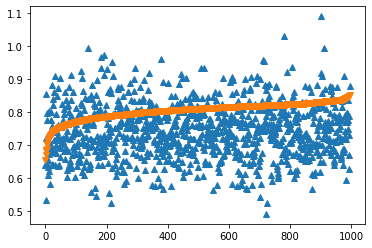

0.08544007824157855 4


In [74]:
sort = np.argsort(Y_test[k<1])
plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
plt.show()

print(np.mean(K),test_size-len(K))

In [75]:
model = Sequential()
model.add(Dense(1000, input_shape=(x.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(x, y,
                    validation_data = (X_test, Y_test),
                    callbacks=[es],
                    epochs=200,
                    batch_size=50,
                    verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000)              2501000   
_________________________________________________________________
dense_17 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_18 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 251       
Total params: 3,127,001
Trainable params: 3,127,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 2s 21ms/step - loss: 398.9276 - mae: 4.7822 - val_loss: 0.0258 - val_mae: 0.1469
Epoch 2/200
80/80 [==============================] - 2s 21ms/step - loss: 0.1178 - mae: 0.2136 - val_loss: 0

Epoch 56/200
80/80 [==============================] - 2s 19ms/step - loss: 0.0014 - mae: 0.0302 - val_loss: 0.0178 - val_mae: 0.1281
Epoch 57/200
80/80 [==============================] - 1s 19ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0044 - val_mae: 0.0562
Epoch 58/200
80/80 [==============================] - 1s 18ms/step - loss: 0.0012 - mae: 0.0289 - val_loss: 0.0073 - val_mae: 0.0772
Epoch 59/200
80/80 [==============================] - 1s 18ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0113 - val_mae: 0.0986
Epoch 60/200
80/80 [==============================] - 2s 23ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0083 - val_mae: 0.0828
Epoch 61/200
80/80 [==============================] - 1s 18ms/step - loss: 0.0010 - mae: 0.0242 - val_loss: 0.0061 - val_mae: 0.0686


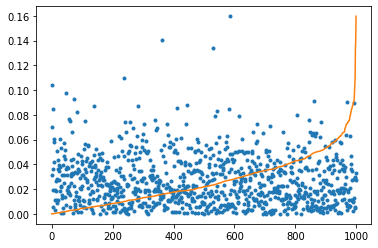

In [76]:
y_pred = model.predict(X_test)
Y_test.shape = (test_size,)
y_pred.shape = (test_size,)
k = np.abs(y_pred-Y_test)
K = k[k<1]
plt.plot(range(len(K)),K,'.',range(len(K)),np.sort(K))
plt.show()

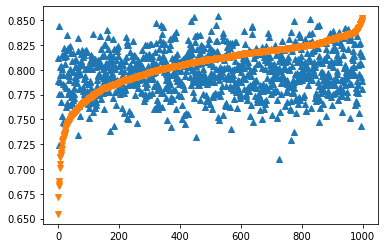

0.026527656 0


In [77]:
sort = np.argsort(Y_test[k<1])
plt.plot(range(len(K)),y_pred[k<1][sort],'^', range(len(K)), Y_test[k<1][sort],'v')
plt.show()

print(np.mean(K),test_size-len(K))